In [8]:
%cd /content/drive/MyDrive/Data Mining/1. Survival Analysis

/content/drive/MyDrive/Data Mining/1. Survival Analysis


In [1]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4032 sha256=14a198ec94a355b12b304e37f3ad57ed8e250b28918da540f56241dbbe0cab4b
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [4]:
import pandas as pd

In [11]:
dataset = pd.read_csv("solder.csv")
dataset.head()

,Opening,Solder,Mask,PadType,Panel,skips
0,L,Thick,A1.5,W4,1,0
1,L,Thick,A1.5,W4,2,0
2,L,Thick,A1.5,W4,3,0
3,L,Thick,A1.5,D4,1,0
4,L,Thick,A1.5,D4,2,0


In [13]:
#transformation
dataset.loc[dataset.Solder == "Thick", "Solder"] = 0
dataset.loc[dataset.Solder == "Thin", "Solder"] = 1
dataset

,Opening,Solder,Mask,PadType,Panel,skips
0,L,0,A1.5,W4,1,0
1,L,0,A1.5,W4,2,0
2,L,0,A1.5,W4,3,0
3,L,0,A1.5,D4,1,0
4,L,0,A1.5,D4,2,0
...,...,...,...,...,...,...
895,S,1,B6,W9,2,21
896,S,1,B6,W9,3,15
897,S,1,B6,L9,1,11
898,S,1,B6,L9,2,33


In [15]:
#Kaplan Meier Estimator
from lifelines import KaplanMeierFitter
model = KaplanMeierFitter()
model.fit(durations = dataset.skips, event_observed = dataset.Solder)

model.event_table.head(4)

/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,285,82,203,900,900
1.0,123,54,69,0,615
2.0,90,43,47,0,492
3.0,45,29,16,0,402


Text(0, 0.5, 'Survival')

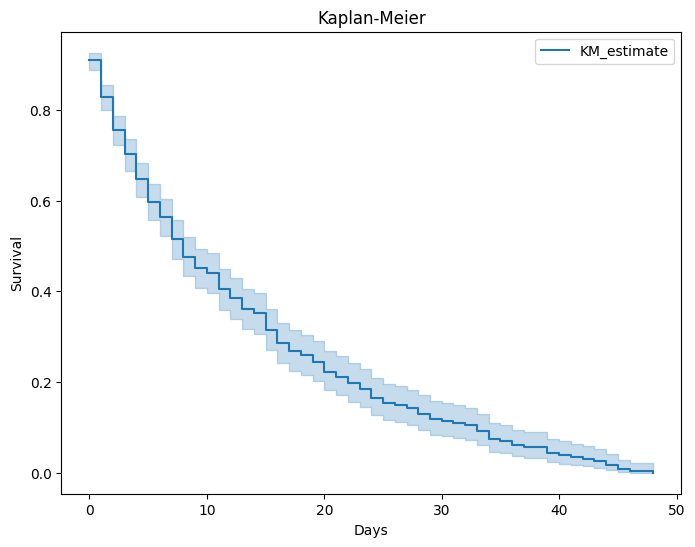

In [16]:
import matplotlib.pyplot as plt
model.plot(figsize = (8,6))
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

In [17]:
#Log Rank Test
from lifelines.statistics import multivariate_logrank_test
multivariate_logrank_test(dataset.skips,
                          dataset.Panel,
                          dataset.Solder)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           6.84 0.03      4.93